**CNN Assignment-3**

**Topic:** Furniture Identification

1. Import training and testing data

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

2. Pre-processing

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Furniture_CNN/train',
                                                 target_size = (64,64),
                                                 batch_size = 15,
                                                 class_mode = 'categorical')

Found 4014 images belonging to 5 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Furniture_CNN/test',
                                               target_size = (64,64),
                                               batch_size = 15,
                                               class_mode = 'categorical')

Found 423 images belonging to 5 classes.


4. Build CNN Model

Initialize CNN

In [ ]:
cnn = tf.keras.models.Sequential()

first convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = (64,64,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

second convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

flatenning layer

In [ ]:
cnn.add(tf.keras.layers.Flatten())

Full connection neural network

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Output layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=5, activation ='softmax'))

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

Validation

In [ ]:
cnn.fit(x=training_set, validation_data=testing_set, epochs=5)
#cnn.fit(x=training_set, validation_data=test_set, epochs=3) #you can give 25

Epoch 1/5
268/268 [==============================] - 26s 93ms/step - loss: 0.9302 - accuracy: 0.6440 - val_loss: 0.6918 - val_accuracy: 0.7589
Epoch 2/5
268/268 [==============================] - 25s 92ms/step - loss: 0.6096 - accuracy: 0.7890 - val_loss: 0.5583 - val_accuracy: 0.8038
Epoch 3/5
268/268 [==============================] - 25s 92ms/step - loss: 0.5194 - accuracy: 0.8186 - val_loss: 0.4561 - val_accuracy: 0.8582
Epoch 4/5
268/268 [==============================] - 24s 91ms/step - loss: 0.4727 - accuracy: 0.8346 - val_loss: 0.4550 - val_accuracy: 0.8251
Epoch 5/5
268/268 [==============================] - 25s 93ms/step - loss: 0.4260 - accuracy: 0.8503 - val_loss: 0.3591 - val_accuracy: 0.8652


In [ ]:
(eval_loss, eval_accuracy) = cnn.evaluate(
    validation_data, validation_labels, batch_size=batch_size,verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

NameError: ignored

In [ ]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Furniture_CNN/unseen/swivelchair1.jpg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
training_set.class_indices
result = cnn.predict(test_image)
result = list(result[0])
label_dict = {0:'Bed', 1:'Chair', 2:'Sofa', 3:'SwivelChair', 4:'Table'}
img_index = result.index(max(result))
print(label_dict[img_index])

SwivelChair


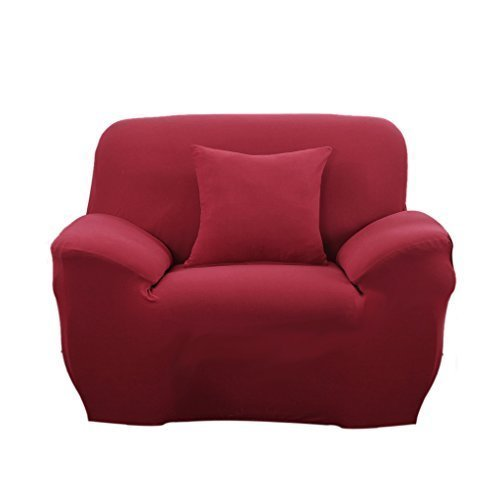

In [ ]:
disp_image = image.load_img('/content/drive/MyDrive/Furniture_CNN/unseen/sofa1.jpg')
from IPython.display import Image,display
display(Image('/content/drive/MyDrive/Furniture_CNN/unseen/sofa1.jpg'))